In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from util.util import get_root_dir

In [9]:
root_dir = get_root_dir()
proj_dir = root_dir + "/surrogate/plastic_train2/"
df_samples = pd.read_csv(proj_dir + "train2_data/lhs_samples.csv", index_col=0)
df_samples

,Light%,Heavy%
0,0.200000,0.800000
1,0.203015,0.796985
2,0.206030,0.793970
3,0.209045,0.790955
4,0.212060,0.787940
...,...,...
195,0.787940,0.212060
196,0.790955,0.209045
197,0.793970,0.206030
198,0.796985,0.203015


In [10]:
df_outputs = pd.read_csv(proj_dir + "train2_data/result4.csv", header=None)
df_outputs.columns = ["Reflux","Stages","Cond Duty","Reb Duty"]
df_outputs

,Reflux,Stages,Cond Duty,Reb Duty
0,6.277090,50.0,0.094499,0.183882
1,6.218799,50.0,0.095088,0.184452
2,6.161828,50.0,0.095673,0.185019
3,6.106189,50.0,0.096255,0.185582
4,6.051839,50.0,0.096833,0.186142
...,...,...,...,...
195,2.660443,50.0,0.180596,0.266431
196,2.653975,50.0,0.180958,0.266774
197,2.647584,50.0,0.181321,0.267119
198,2.641194,50.0,0.181682,0.267462


In [11]:
def extract_reflux(stage_value):
    # Filter df_samples for specified 'Stages' value and select only "Light%" column
    filtered_data_df = df_samples["Light%"]

    # Convert to numpy array
    filtered_data_np = filtered_data_df.to_numpy().reshape(-1, 1)

    # Initialize an empty list to store the concatenated data
    concatenated_data = []

    # Iterate over the filtered DataFrame
    for idx in filtered_data_df.index:
        # Extract the desired columns (0, 2, 3) from df_outputs
        output_row = df_outputs.loc[idx, df_outputs.columns[[0, 2, 3]]].to_numpy()
        # Concatenate with the row from filtered_data_np
        concatenated_row = np.concatenate((filtered_data_np[filtered_data_df.index.get_loc(idx)].reshape(1, -1), [output_row]), axis=1)
        concatenated_data.append(concatenated_row)

    # Convert the list of arrays into a single numpy array
    arr = np.vstack(concatenated_data)
    arr = arr[np.argsort(arr[:, 1])]
    return arr

s50_data = extract_reflux(50)

In [12]:
print(f"Length of data s50: {len(s50_data)}")

Length of data s50: 200


In [15]:
# Light% , RR, Cond, Reb
s50_data

array([[0.8       , 2.63485512, 0.18204321, 0.26780494],
       [0.796985  , 2.64119379, 0.18168218, 0.26746208],
       [0.79397   , 2.64758391, 0.1813213 , 0.26711919],
       [0.790955  , 2.65397536, 0.18095817, 0.26677441],
       [0.78794   , 2.66044345, 0.18059635, 0.26643059],
       [0.784925  , 2.66691556, 0.18023239, 0.26608497],
       [0.78191   , 2.673455  , 0.17986922, 0.26573981],
       [0.778894  , 2.6800074 , 0.17950409, 0.26539303],
       [0.775879  , 2.68662461, 0.17913982, 0.26504676],
       [0.772864  , 2.69325471, 0.17877376, 0.26469904],
       [0.769849  , 2.69995157, 0.17840838, 0.26435168],
       [0.766834  , 2.70666345, 0.17804128, 0.26400291],
       [0.763819  , 2.71344526, 0.17767494, 0.26365455],
       [0.760804  , 2.72024934, 0.17730719, 0.26330501],
       [0.757789  , 2.72708724, 0.17693851, 0.26295467],
       [0.754774  , 2.73399614, 0.17657057, 0.26260469],
       [0.751759  , 2.74093185, 0.17620135, 0.26225365],
       [0.748744  , 2.74791465,

## 50 stages is chosen to be the nominal condition

RR:  1.32 - 6.28 (re tested)

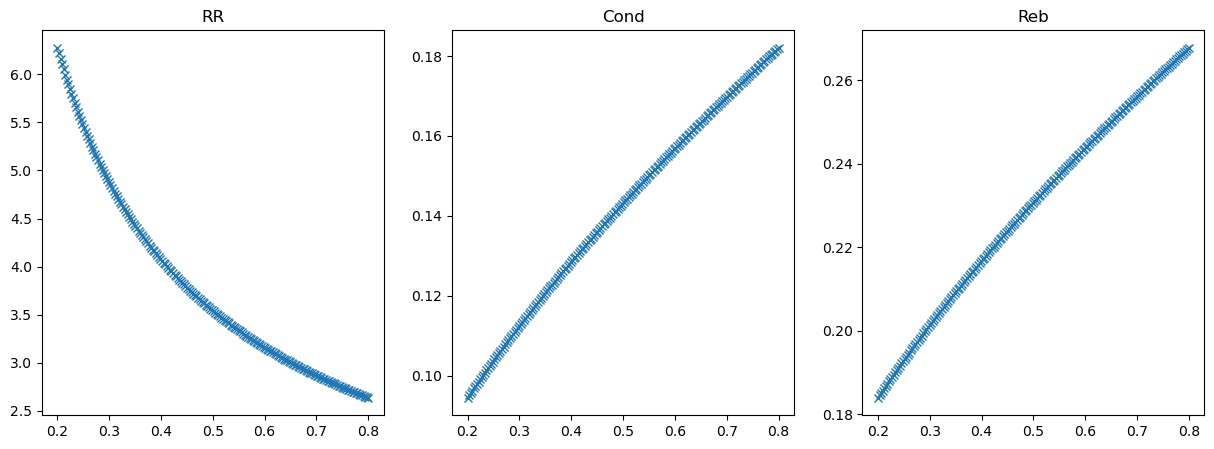

In [16]:
fig, axs = plt.subplots(1, 3, figsize=(15, 5))
# First plot
axs[0].plot(s50_data.T[0], s50_data.T[1], 'x')
axs[0].set_title('RR')

# Second plot
axs[1].plot(s50_data.T[0], s50_data.T[2], 'x')
axs[1].set_title('Cond')

# Third plot
axs[2].plot(s50_data.T[0], s50_data.T[3], 'x')
axs[2].set_title('Reb')

# Display the plots
plt.show()

array([  9.58041677, -14.90128207,   8.57296958])

In [26]:
coefs1 = np.polyfit(s50_data.T[0], s50_data.T[1], 2)

# Validate
p = np.poly1d(coefs1)
RR_pred = p(s50_data.T[0])

# Calculate SSR and SST
ssr = np.sum((RR_pred - s50_data.T[1]) ** 2)
sst = np.sum((s50_data.T[1] - np.mean(s50_data.T[1])) ** 2)

# Calculate R^2
r_squared = 1 - (ssr / sst)

print("R^2:", r_squared)

coefs1

R^2: 0.9928713901446486


array([  9.58041677, -14.90128207,   8.57296958])

In [28]:
coefs2 = np.polyfit(s50_data.T[0], s50_data.T[2], 1)

# Validate
p = np.poly1d(coefs2)
RR_pred = p(s50_data.T[0])

# Calculate SSR and SST
ssr = np.sum((RR_pred - s50_data.T[2]) ** 2)
sst = np.sum((s50_data.T[2] - np.mean(s50_data.T[2])) ** 2)

# Calculate R^2
r_squared = 1 - (ssr / sst)

print("R^2:", r_squared)

coefs2

R^2: 0.9965067339336932


array([0.14382372, 0.06973313])

In [30]:
coefs2 = np.polyfit(s50_data.T[0], s50_data.T[3], 1)

# Validate
p = np.poly1d(coefs2)
RR_pred = p(s50_data.T[0])

# Calculate SSR and SST
ssr = np.sum((RR_pred - s50_data.T[3]) ** 2)
sst = np.sum((s50_data.T[3] - np.mean(s50_data.T[3])) ** 2)

# Calculate R^2
r_squared = 1 - (ssr / sst)

print("R^2:", r_squared)

coefs2

R^2: 0.9961965113663492


array([0.13778926, 0.16032166])